# Example of a cholesteric liquid crystal

Author: O. Castany, C. Molinaro, M. Müller

In [1]:
import elli
import elli.plot.structure as elliplot
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.scimath import sqrt
from scipy.constants import c, pi

## Set parameters

In [2]:
# Materials
front = back = elli.IsotropicMaterial(elli.ConstantRefractiveIndex(1.6))

# Liquid crystal oriented along the x direction
(no, ne) = (1.5, 1.7)
Dn = ne - no
n_med = (ne + no) / 2
LC = elli.UniaxialMaterial(
    elli.ConstantRefractiveIndex(no), elli.ConstantRefractiveIndex(ne)
)  #  ne along z
R = elli.rotation_v_theta(elli.e_y, 90)  #  rotation round y
LC.set_rotation(R)  #  apply rotation from z to x
# Cholesteric pitch:
p = 650
# One half turn of a right-handed helix:
TN = elli.TwistedLayer(LC, p / 2, 25, 180)

# Inhomogeneous layer, repeated layer, and structure
N = 5  #  number half pitch repetitions
h = N * p / 2
L = elli.RepeatedLayers([TN], N)
s = elli.Structure(front, [L], back)

# Normal incidence:
Kx = 0.0

# Calculation parameters
lbda_min, lbda_max = 600, 1500  #  (nm)
lbda = np.linspace(lbda_min, lbda_max, 100)
k0 = 2 * pi / (lbda * 1e-9)

## Analytical calculation for the power reflection coefficient

In [3]:
q = 2 * pi / p / 1e-9
alpha = q / k0
epsilon = (no**2 + ne**2) / 2
delta = (no**2 - ne**2) / 2
n2 = sqrt((alpha**2 + epsilon - sqrt(4 * epsilon * alpha**2 + delta**2)))
w = 1j * (ne**2 - n2**2 - alpha**2) / (2 * alpha * n2)  # not k0/c
A = -2j * k0 * n2 * h * 1e-9

R_th = (
    np.abs(
        (w**2 + 1)
        * (1 - np.exp(-2j * k0 * n2 * h * 1e-9))
        / (
            2 * w * (1 + np.exp(-2j * k0 * n2 * h * 1e-9))
            - 1j * (w**2 - 1) * (1 - np.exp(-2j * k0 * n2 * h * 1e-9))
        )
    )
    ** 2
)

## Calculation with Berreman4x4

In [4]:
data = s.evaluate(lbda, 0)

# Jones matrices for the circular wave basis
# Right-circular wave is reflected in the stop-band
# R_LR, T_LR close to zero
R_RR = data.Rc_RR

## Plotting

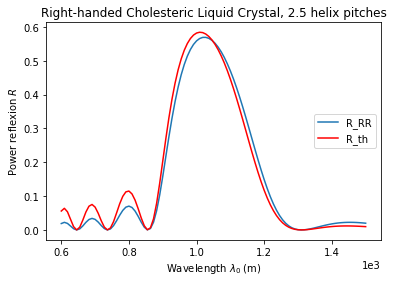

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(lbda, R_RR, label="R_RR")
ax.plot(lbda, R_th, "r", label="R_th")

ax.legend(loc="center right", bbox_to_anchor=(1.00, 0.50))

ax.set_title(
    "Right-handed Cholesteric Liquid Crystal, " + "{:.1f} helix pitches".format(N / 2.0)
)
ax.set_xlabel(r"Wavelength $\lambda_0$ (m)")
ax.set_ylabel(r"Power reflexion $R$")
fmt = ax.xaxis.get_major_formatter()
fmt.set_powerlimits((-3, 3))

plt.show()

<AxesSubplot:xlabel='z (nm)', ylabel="n'">

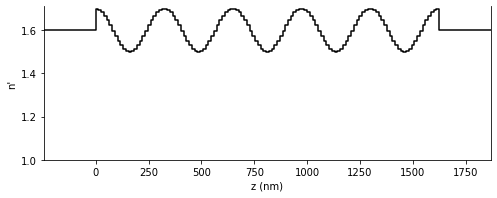

In [6]:
elliplot.draw_structure(s)